In [1]:
import pandas as pd
import numpy as np
import string
from string import digits


import matplotlib.pyplot as plt

%matplotlib inline
import re
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense
from tensorflow.keras.models import Model

In [2]:
lines= pd.read_csv("NeuroHack_train.csv",encoding='utf-8')


In [3]:
lines.shape


(2566, 5)

In [4]:
lines.head()

,English,Hindi,Hinglish,Average rating,Disagreement
0,Program module is a file that contains instruc...,"माड्यूल, एक संचिका होती है, जिसमें या तो स्रोत...","module , ek program hoti hai , jismen ya to so...",7,6
1,And to Thamud We sent their brother Sali 'h. H...,और (हमने) क़ौमे समूद के पास उनके भाई सालेह को ...,aur hamne aume samood ke pas unke bhaee saleh ...,6,4
2,"and, when reminded, do not remember\n","और जब उन्हें याद दिलाया जाता है, तो वे याद नही...","aur jab unhen yad dilaya jata hai , to ve yad ...",10,0
3,you won the TED Prize 2011.\n,तुम्हें २०११ का टेड प्राइज़ मिल गया है.\n,tumhen २०११ ka ted prize mil gaya hai\n,9,1
4,He gone to Kerodemal College of Delhi Universi...,उन्होंने बाद अध्ययन करने के लिए ये दिल्ली विश्...,unhonne bad science karne ke lie ye delhi univ...,7,0


## DATA CLEANING


In [17]:
lines['English']=lines['English'].apply(lambda x: x.lower())

lines['Hindi']=lines['Hindi'].apply(lambda x: x.lower())
lines['Hinglish']=lines['Hinglish'].apply(lambda x: x.lower())

In [18]:
lines['English']=lines['English'].apply(lambda x: re.sub("'", '', x))

lines['Hindi']=lines['Hindi'].apply(lambda x: re.sub("'", '', x))
lines['Hinglish']=lines['Hinglish'].apply(lambda x: re.sub("'", '', x))

In [19]:
exclude = set(string.punctuation) # Set of all special characters
# Remove all the special characters
lines['English']=lines['English'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

lines['Hindi']=lines['Hindi'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
lines['Hinglish']=lines['Hinglish'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

In [20]:
remove_digits = str.maketrans('', '', digits)
lines['English']=lines['English'].apply(lambda x: x.translate(remove_digits))

lines['Hindi'] = lines['Hindi'].apply(lambda x: re.sub("[२३०८१५७९४६]", "", x))
lines['Hinglish']=lines['Hinglish'].apply(lambda x: x.translate(remove_digits))



In [21]:
lines['English']=lines['English'].apply(lambda x: x.strip())
lines['English']=lines['English'].apply(lambda x: re.sub(" +", " ", x))


lines['Hindi']=lines['Hindi'].apply(lambda x: x.strip())
lines['Hinglish']=lines['Hinglish'].apply(lambda x: x.strip())
lines['Hindi']=lines['Hindi'].apply(lambda x: re.sub(" +", " ", x))
lines['Hinglish']=lines['Hinglish'].apply(lambda x: re.sub(" +", " ", x))

In [22]:
lines.head()


,English,Hindi,Hinglish,Average rating,Disagreement
0,program module is a file that contains instruc...,माड्यूल एक संचिका होती है जिसमें या तो स्रोत क...,module ek program hoti hai jismen ya to source...,7,6
1,and to thamud we sent their brother sali h he ...,और हमने क़ौमे समूद के पास उनके भाई सालेह को पै...,aur hamne aume samood ke pas unke bhaee saleh ...,6,4
2,and when reminded do not remember,और जब उन्हें याद दिलाया जाता है तो वे याद नहीं...,aur jab unhen yad dilaya jata hai to ve yad na...,10,0
3,you won the ted prize,तुम्हें का टेड प्राइज़ मिल गया है,tumhen २०११ ka ted prize mil gaya hai,9,1
4,he gone to kerodemal college of delhi universi...,उन्होंने बाद अध्ययन करने के लिए ये दिल्ली विश्...,unhonne bad science karne ke lie ye delhi univ...,7,0


In [23]:
text = " ".join(eng.split()[1] for eng in lines.English)

In [24]:
from wordcloud import WordCloud


In [25]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)


## Expoloratory Data Analysis

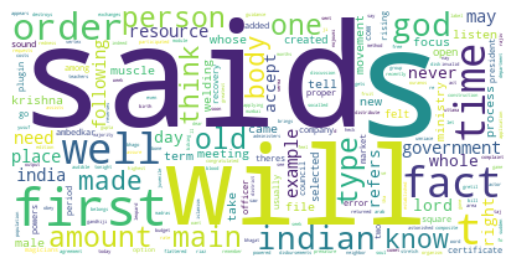

In [26]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

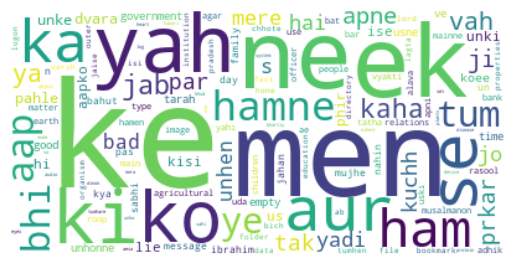

In [27]:
text = " ".join(hing.split()[1] for hing in lines.Hinglish)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


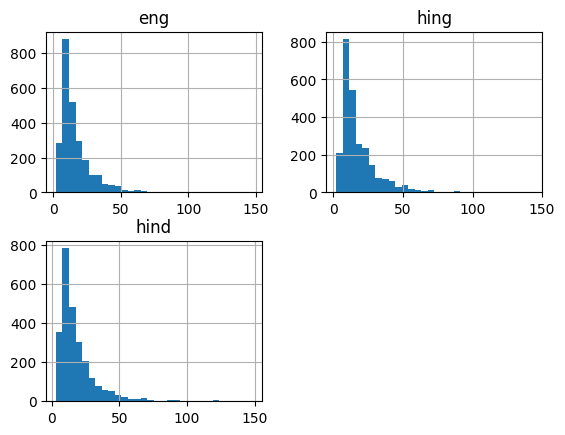

In [28]:
eng_l = []
hing_l = []
hind_l = []
# populate the lists with sentence lengths
for i in lines.English:
      eng_l.append(len(i.split()))

for i in lines.Hindi:
      hind_l.append(len(i.split()))

for i in lines.Hinglish:
      hing_l.append(len(i.split()))

length_df = pd.DataFrame({'eng':eng_l, 'hing':hing_l, 'hind':hind_l})

length_df.hist(bins = 30)
plt.show()